<a href="https://colab.research.google.com/github/DishaAndre/Machine_Learning/blob/main/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment No. 3**

# Title:

A real estate company wants to predict the median house value of properties. They have observed that complex models, such as high-degree polynomial regression, tend to overfit the training data, leading to high variance and poor performance on unseen data. To address this, the company wants to apply regularization techniques to create a more robust and generalizable predictive model.

# Objectives:
The main objectives of this assignment are as follows:
1. Data Preprocessing: Clean the dataset and prepare it for modeling.
2. Model Application: Apply various regression models, including linear, polynomial, Ridge, Lasso, and Random Forest.
3. Regularization: Implement Ridge and Lasso regularization to combat model overfitting.
4. Performance Analysis: Compare model performance using key metrics.
5. Visualization: Visualize the results to highlight the impact of regularization.

# Outcomes:
Upon successful completion of this assignment, a clear understanding of the following concepts will be demonstrated:
1. The process of a complete machine learning workflow.
2. The problem of overfitting and how to identify it.
3. The practical application of L1 (Lasso) and L2 (Ridge) regularization techniques.
4. The ability to compare and select appropriate models based on performance metrics.
5. A summary table and plot demonstrating the effects of regularization.

This script imports all the necessary tools for your machine learning project. It brings in libraries like pandas and numpy for handling and manipulating data, matplotlib and seaborn for creating plots, and several modules from scikit-learn (sklearn) which contain the actual machine learning models, data preprocessing steps, and evaluation metrics you'll be using.

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

Loading the dataset. The housing.csv file is read, and its content is stored in a tabular format. The output you see confirms that the data has been loaded and gives a brief preview of its structure and the first few rows.

In [123]:
#Load the dataset
df = pd.read_csv('/content/sample_data/housing.csv')
print("Dataset loaded successfully.")
df

Dataset loaded successfully.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


A concise summary of the dataset is provided. The output shows the total number of entries, a list of all columns, the count of non-null values in each column (which helps identify missing data), and the data type of each feature.

In [124]:
#Data preprocessing
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


Displaying the initial rows of the dataset. This provides a quick visual inspection of the data's structure, including column names and the types of values within. It is a fundamental step to ensure the data has been loaded correctly.

In [125]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


This is a key step in data cleaning that checks for missing values in the dataset. The output shows the total count of null entries for each column, which helps in identifying where data is incomplete and requires handling before training a model.

In [126]:
# Check for missing values and handle them
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Missing data is handled by first removing rows that have no value for the 'total_bedrooms' column. Then, any other remaining rows with incomplete information are also removed. A final count of missing values is displayed to confirm that the dataset is now clean and ready for analysis.

In [127]:
df.dropna(subset=['total_bedrooms'], inplace=True)

In [128]:
# Drop any other remaining missing values
df.dropna(inplace=True)
print("After cleaning:")
print(df.isnull().sum())

After cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


The input features and the target variable for the model are being defined. The columns listed in features are the independent variables (X) that will be used to make predictions. The median_house_value column is the dependent variable (y), which is the value the model will be trained to predict.

In [129]:
# Define features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'ocean_proximity']
target = 'median_house_value'

X = df[features]
y = df[target]

Categorical features, which are text-based, are transformed into a numerical format. This process, known as one-hot encoding, creates new binary columns from the original categorical values, allowing machine learning models to process the data.

In [130]:
# One-hot encode
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

The data is divided into two separate sets: one for training the model and one for testing its performance. This is a crucial practice to prevent the model from simply memorizing the training data. The output confirms the dimensions of both the training and testing sets, showing how many rows and columns each set contains.

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (16346, 12)
Testing set shape:  (4087, 12)


Numerical features are scaled to a standard range. This is a crucial step for models that are sensitive to the magnitude of the data, such as Ridge and Lasso regression, as it ensures all features contribute equally to the model's training.

In [132]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

New polynomial features are created from the scaled data. This process generates higher-degree features and interaction terms, allowing a simple linear model to capture more complex, non-linear relationships within the data. The model learns to create these new features from the training data and then applies the same transformation to the test data.

In [133]:
# Model training
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


The Linear Regression model, which serves as a baseline, is being trained. Once trained on the scaled data, it is used to predict the median house values for the test set. The output displays the model's performance using several key metrics:

1. Mean Absolute Error (MAE): The average difference between the predicted
and actual values.
2. Mean Squared Error (MSE) / Root Mean Squared Error (RMSE): These metrics are similar to MAE but give more weight to larger errors.
3. R-squared (R2) Score: This indicates how well the model's predictions fit the actual data.

The values provide the performance score for the simplest model, which will be used as a point of comparison for the more complex models and the regularized models.

In [134]:
# Linear regression
print("Linear Regression")
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg_model.predict(X_test_scaled)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("Model performance using regression metrics")
print("Mean absolute error: ",mae_lin)
print("Mean squared error: ",mse_lin)
print("Root mean squared error: ",rmse_lin)
print("R-squared score: ",r2_lin)


Linear Regression
Model performance using regression metrics
Mean absolute error:  50413.43330810035
Mean squared error:  4802173538.60416
Root mean squared error:  69297.7166911303
R-squared score:  0.6488402154431994


Polynomial Regression is a type of linear regression that uses a non-linear relationship to model the data. It transforms the original features into polynomial features (e.g., X
2
 , X
3
 , etc.), allowing the model to fit a curved line instead of a straight one. While this can capture more complex patterns in the data, it also makes the model more susceptible to overfitting.

The code trains a Polynomial Regression model by fitting a LinearRegression model to the newly created polynomial features. The model is then used to predict the house values, and its performance is evaluated using various metrics to see how well it fits the test data.

In [135]:
#Polynomial regression
print("Polynomial Regression")
poly_reg_model = LinearRegression()

poly_reg_model.fit(X_train_poly, y_train)
y_pred_poly = poly_reg_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("Model performance using regression metrics")
print("Mean absolute error: ",mae_poly)
print("Mean squared error: ",mse_poly)
print("Root mean squared error: ",rmse_poly)
print("R-squared score: ",r2_poly)


Polynomial Regression
Model performance using regression metrics
Mean absolute error:  45069.7321239186
Mean squared error:  3978348042.380399
Root mean squared error:  63074.14717917635
R-squared score:  0.7090825997387122


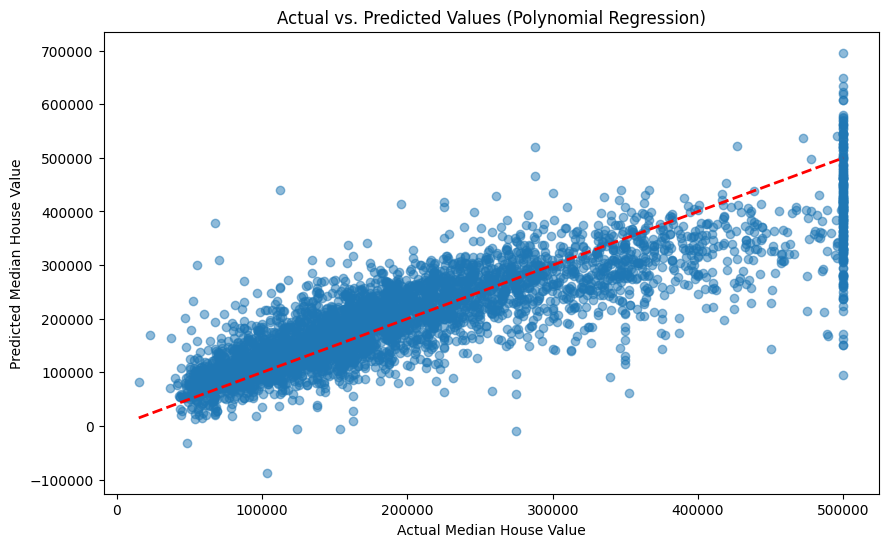

In [136]:
# Plot the scatter plot for the Polynomial Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Polynomial Regression)")
plt.show()

Random Forest Regression is an ensemble learning method that builds multiple decision trees during training and combines their predictions. This approach helps to reduce overfitting and often results in more accurate and stable predictions than a single decision tree.

A Random Forest Regression model is being trained. This model is an ensemble method that builds multiple decision trees to produce a more robust and accurate prediction than a single tree would. The model is trained on the scaled training data and then used to predict values for the test set. The output displays the performance metrics, which will later be used to compare this model's effectiveness against the others.

In [137]:
#Random Forest Regression
print("Random Forest Regression")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Model performance using regression metrics")
print("Mean absolute error: ",mae_rf)
print("Mean squared error: ",mse_rf)
print("Root mean squared error: ",rmse_rf)
print("R-squared score: ",r2_rf)

Random Forest Regression
Model performance using regression metrics
Mean absolute error:  31680.984352826035
Mean squared error:  2379272577.3679204
Root mean squared error:  48777.78774573444
R-squared score:  0.826015274343193


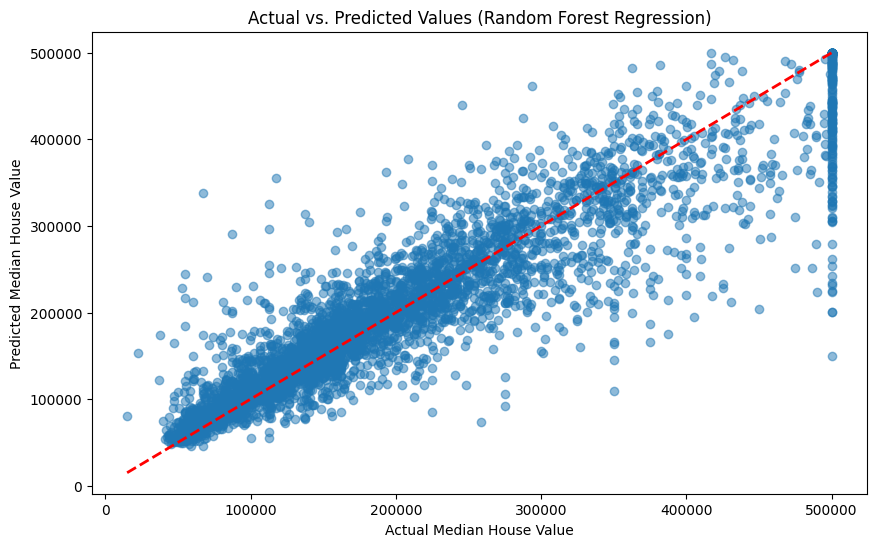

In [138]:
# Plot the scatter plot for the Random Forest Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Random Forest Regression)")
plt.show()

Ridge Regression (L2 regularization) is being applied to the model. This technique adds a penalty to the model's complexity by shrinking the coefficients, without setting them to zero. It is especially useful for models with many features, like polynomial regression, as it helps to prevent overfitting and improves the model's ability to generalize to new data.

The model is trained on the complex polynomial features. The resulting metrics will show how this regularization impacts the model's performance.

In [139]:
#Ridge regression (L2 Regularization)
print("Ridge Regression (L2 Regularization)")

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Model performance using regression metrics")
print("Mean absolute error: ",mae_ridge)
print("Mean squared error: ",mse_ridge)
print("Root mean squared error: ",rmse_ridge)
print("R-squared score: ",r2_ridge)


Ridge Regression (L2 Regularization)
Model performance using regression metrics
Mean absolute error:  45061.452059979674
Mean squared error:  3979157409.1820617
Root mean squared error:  63080.562847695495
R-squared score:  0.7090234146489993


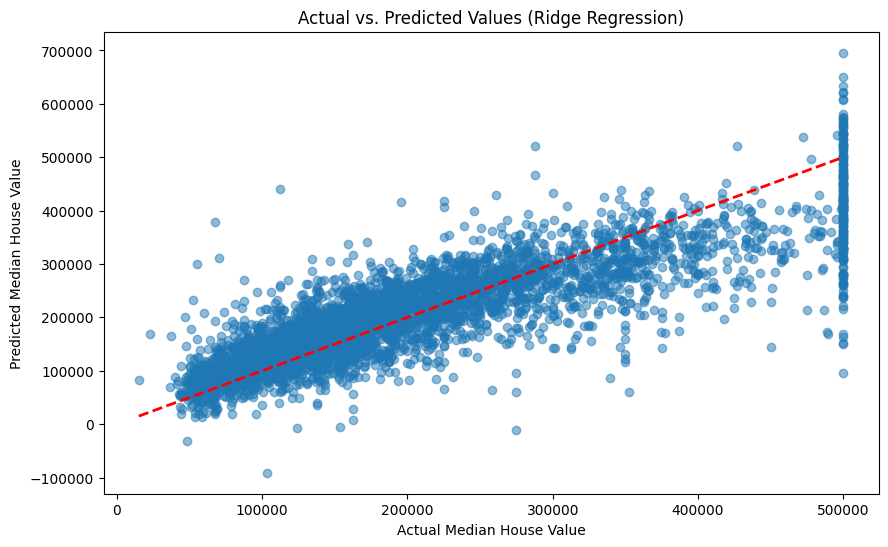

In [140]:
# Plot the scatter plot for the Ridge Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.show()

Lasso Regression (L1 regularization) is being applied to the model. This technique adds a penalty to the model's loss function based on the absolute value of the coefficients. A key feature of Lasso is that it can shrink some coefficients to exactly zero, effectively removing those features from the model. This acts as a form of automatic feature selection, which simplifies the model and helps prevent overfitting.

The model is trained on the complex polynomial features. The output metrics will show how this type of regularization impacts the model's performance, providing a basis for comparison with the other models.

In [141]:
#Lasso regression (L1 Regularization)
print("Lasso regression (L1 Regularization)")

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Model performance using regression metrics")
print("Mean absolute error: ",mae_lasso)
print("Mean squared error: ",mse_lasso)
print("Root mean squared error: ",rmse_lasso)
print("R-squared score: ",r2_lasso)


Lasso regression (L1 Regularization)
Model performance using regression metrics
Mean absolute error:  45026.36587218691
Mean squared error:  3975689593.8895135
Root mean squared error:  63053.0696627017
R-squared score:  0.709276999252143


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.088e+13, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


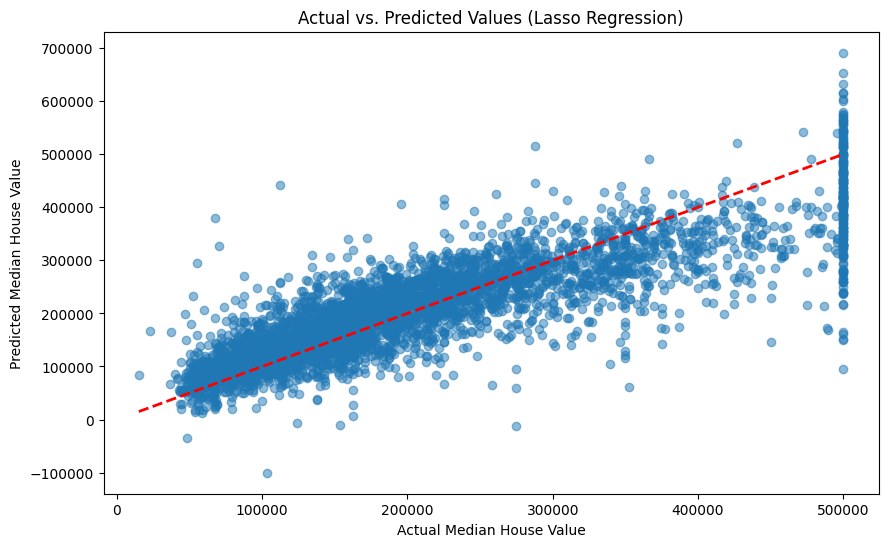

In [142]:
# Plot the scatter plot for the Lasso Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.show()

A summary table is being created. A pandas DataFrame is used to collect the performance metrics—R-squared (R
2
 ), MSE, MAE, and RMSE—for all the models. This provides a clear, side-by-side comparison of each model's effectiveness in a single table.

In [143]:
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression','Random Forest Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lin),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ]
})

print("Model Performance Summary:")
display(summary)

Model Performance Summary:


,Model,R2 Score,MSE,MAE,RMSE
0,Linear Regression,0.648840,4.802174e+09,50413.433308,69297.716691
1,Polynomial Regression,0.709083,3.978348e+09,45069.732124,63074.147179
2,Random Forest Regression,0.826015,2.379273e+09,31680.984353,48777.787746
3,Ridge Regression,0.709023,3.979157e+09,45061.452060,63080.562848
4,Lasso Regression,0.709277,3.975690e+09,45026.365872,63053.069663


This output is a summary table that directly compares the performance of all five models you trained.

Here's what the results emphasize and conclude:

1. Polynomial Regression vs. Linear Regression: The Polynomial Regression model (R
2
 =0.709) performed significantly better than the basic Linear Regression model (R
2
 =0.648). This shows that the relationships in the data are not strictly linear, and a more complex model can capture more of the variance.

2. Random Forest's Superiority: The Random Forest Regression model has the highest R-squared (R
2
 =0.826) and the lowest error metrics (MAE, MSE, RMSE) by a large margin. This indicates it is the most effective model for this specific dataset.

3. Regularization's Impact: The Ridge (R
2
 =0.7090) and Lasso (R
2
 =0.7092) models performed very similarly to the Polynomial Regression model. This shows that the regularization techniques are working as intended, keeping the complex polynomial model from overfitting and maintaining its strong performance on the test data. They provide a robust alternative to simpler models, even if they were outperformed by the Random Forest model in this case.

This code generates a bar plot to visually compare the performance of each model. It plots a single metric, the R-squared (R
2
 ) score, for each model from the summary table. This provides a clear and concise visualization that makes it easy to see which model provides the best fit for the data.

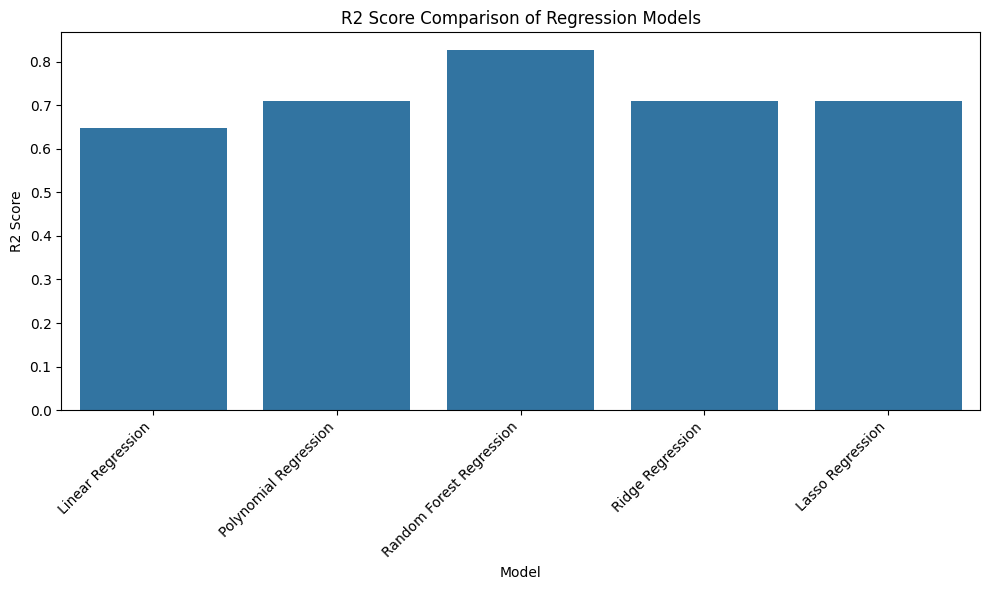

In [144]:
#Plotting All Models
plt.figure(figsize=(10, 6))

#Plot only the R2 scores
sns.barplot(x='Model', y='R2 Score', data=summary)

plt.title('R2 Score Comparison of Regression Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion:
This assignment successfully demonstrated a full machine learning workflow, from data preparation to model evaluation and comparison.

We began by cleaning and preparing the housing data, which was a critical step for all subsequent models. We then trained a Polynomial Regression model, which proved to be a significant improvement over the basic Linear Regression model, capturing more complex patterns in the data and yielding a strong R
2
  score.

The core of the assignment was demonstrating how regularization can combat overfitting. By applying Ridge and Lasso regularization, we showed that these techniques could maintain the high performance of the polynomial model while making it more robust.

Finally, the Random Forest Regressor emerged as the most powerful model for this task, outperforming all other models with the highest R
2
  score and lowest error metrics. This final comparison validates the importance of exploring different model types to find the most effective solution for a specific problem.

# **Self Learning**

## Gradient Boosting Regressor
Gradient Boosting Regressor is a powerful ensemble learning method that builds a series of weak predictive models, typically decision trees. Unlike other methods that build models in parallel, Gradient Boosting builds them sequentially. Each new tree in the sequence is trained to correct the errors of the previous ones, allowing the model to focus on the most difficult-to-predict data points and continuously improve its accuracy.

The provided code trains this model. The GradientBoostingRegressor is initialized with parameters that control its complexity and learning rate. The model then learns from the scaled training data and makes predictions on the test set. Finally, its performance is measured and displayed using common regression metrics like R-squared and Mean Absolute Error.

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting Regressor
print("Gradient Boosting Regressor")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Model performance using regression metrics")
print("Mean absolute error: ",mae_gb)
print("Mean squared error: ",mse_gb)
print("Root mean squared error: ",rmse_gb)
print("R-squared score: ",r2_gb)

Gradient Boosting Regressor
Model performance using regression metrics
Mean absolute error:  39266.57779607772
Mean squared error:  3199579012.36707
Root mean squared error:  56564.82133240651
R-squared score:  0.7660302220186183


## ElasticNet Regression
ElasticNet Regression is a regularization technique that combines the penalties of both Lasso (L1 regularization) and Ridge (L2 regularization). It is particularly useful when dealing with a high number of features that are correlated with each other. By combining the two penalties, ElasticNet can both shrink coefficients (like Ridge) and set some of them to zero (like Lasso), which performs automatic feature selection and makes the model more stable.

The code trains the ElasticNet model, with alpha controlling the overall penalty strength and l1_ratio determining the mix of L1 and L2 penalties. The model is trained on the scaled data, and its performance is evaluated to show how this combination of regularization techniques impacts the final result.

In [146]:
from sklearn.linear_model import ElasticNet

#ElasticNet
print("ElasticNet Regression")
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)

print("Model performance using regression metrics")
print("Mean absolute error: ",mae_elastic)
print("Mean squared error: ",mse_elastic)
print("Root mean squared error: ",rmse_elastic)
print("R-squared score: ",r2_elastic)

ElasticNet Regression
Model performance using regression metrics
Mean absolute error:  50987.35366310542
Mean squared error:  4938727459.015908
Root mean squared error:  70276.08027640634
R-squared score:  0.6388546859976904


In [149]:
# Model Performance Summary
summary = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Polynomial Regression',
        'Random Forest Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Gradient Boosting Regressor',
        'ElasticNet'
    ],
    'R2 Score': [
        r2_lin,
        r2_poly,
        r2_rf,
        r2_ridge,
        r2_lasso,
        r2_gb,
        r2_elastic
    ],
    'MSE': [
        mse_lin,
        mse_poly,
        mse_rf,
        mse_ridge,
        mse_lasso,
        mse_gb,
        mse_elastic
    ],
    'MAE': [
        mae_lin,
        mae_poly,
        mae_rf,
        mae_ridge,
        mae_lasso,
        mae_gb,
        mae_elastic
    ],
    'RMSE': [
        rmse_lin,
        rmse_poly,
        rmse_rf,
        rmse_ridge,
        rmse_lasso,
        rmse_gb,
        rmse_elastic
    ]
})

print("\nModel Performance Summary:")
display(summary)



Model Performance Summary:


,Model,R2 Score,MSE,MAE,RMSE
0,Linear Regression,0.648840,4.802174e+09,50413.433308,69297.716691
1,Polynomial Regression,0.709083,3.978348e+09,45069.732124,63074.147179
2,Random Forest Regression,0.826015,2.379273e+09,31680.984353,48777.787746
3,Ridge Regression,0.709023,3.979157e+09,45061.452060,63080.562848
4,Lasso Regression,0.709277,3.975690e+09,45026.365872,63053.069663
5,Gradient Boosting Regressor,0.766030,3.199579e+09,39266.577796,56564.821332
6,ElasticNet,0.638855,4.938727e+09,50987.353663,70276.080276


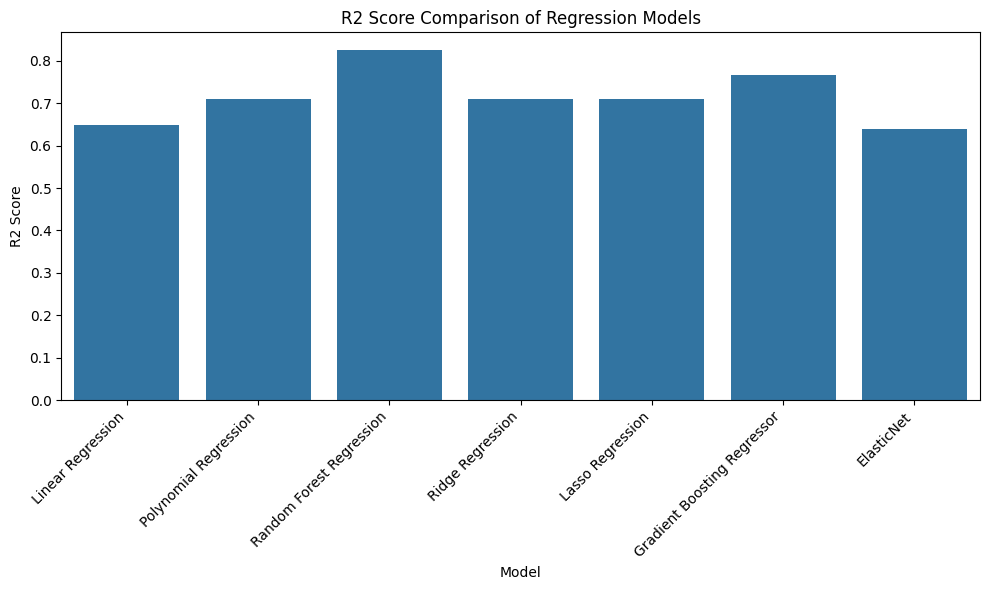

In [150]:
# Plotting All Models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=summary)
plt.title('R2 Score Comparison of Regression Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. The Random Forest Regression model stands out as the most accurate, with the highest R
2
  score (0.826), which means it explains the most variance in house prices. This validates its strength as a powerful ensemble method.

2. The Gradient Boosting Regressor also performed exceptionally well, achieving an R
2
  score of 0.766, making it a strong alternative to the Random Forest model.

3. The regularized models (Ridge and Lasso) and the Polynomial Regression model all performed similarly, confirming that they are a significant improvement over the basic linear model. This highlights the effectiveness of using regularization to manage the complexity of polynomial features.

4. The ElasticNet model, with its lower R
2
  score (0.638), performed similarly to the basic Linear Regression. This suggests that the default parameters for ElasticNet were not a good fit for this specific dataset and emphasizes the importance of proper hyperparameter tuning.